In [1]:
import os
import sys
import pickle
import warnings
import time
import logging
import glob


import numpy as np
from sklearn.neighbors import KDTree
import matplotlib.pyplot as plt
from iminuit import Minuit


from utils import *


import seaborn as sns
from matplotlib import rcParams
from cycler import cycler


## Set plotting style and print options
sns.set_theme()
sns.set_style("darkgrid")
sns.set_context("paper") #Possible are paper, notebook, talk and poster

d = {'lines.linewidth': 2, 'axes.titlesize': 20, 'axes.titleweight': 'bold', 'axes.labelsize': 18, 'xtick.labelsize': 12, 'axes.labelweight': 'bold', 'ytick.labelsize': 12,\
     'legend.fontsize': 15, 'font.family': 'serif', 'font.weight': 'bold', 'figure.titlesize': 20,'figure.titleweight': 'bold',\
          'figure.labelsize': 18,'figure.labelweight': 'bold', 'figure.figsize': (9,6), }
d_colors = {'axes.prop_cycle': cycler(color = ['teal', 'navy', 'coral', 'plum', 'purple', 'olivedrab',\
         'black', 'red', 'cyan', 'brown', 'green', 'yellow', 'khaki','lightblue'])}
rcParams.update(d)
rcParams.update(d_colors)
np.set_printoptions(precision = 5, suppress=1e-10)

In [3]:
output_path = 'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\output'
save_path = 'data'
path0 = os.path.join(output_path, 'exp0')
sys.path.append(output_path)

Nexp = len(os.listdir(output_path))
Nframes = len(np.loadtxt(os.path.join(path0, 'Ndefects_act0.1.txt')))

act_list = []

for file in os.listdir(path0):
    if file.startswith('Ndefects'):
        activity = file.split('act')[-1].split('.txt')[0]
        act_list.append(float(activity))

Nactivity = len(act_list)
conv_list = [125, 115, 80, 35, 35, 35, 25, 0, 0, 0, 0, 0, 0, 0]
Nexp, Nframes,

(10, 181)

In [306]:

conv_dict = dict(zip(act_list, conv_list))

window_sizes = np.loadtxt(os.path.join(path0, 'window_sizes.txt'))

defect_arr = np.zeros((Nframes, Nactivity, Nexp))

for i, act in enumerate(act_list):
    for j, exp in enumerate(os.listdir(output_path)):
        path = os.path.join(output_path, exp)
        defect_arr[:, i, j] = np.loadtxt(os.path.join(path, 'Ndefects_act{}.txt'.format(act)))
np.save(os.path.join(save_path, 'defect_arr.npy'), defect_arr)


av_counts = np.nan * np.zeros([Nframes, len(window_sizes), Nactivity, Nexp])
var_counts = np.nan * np.zeros([Nframes, len(window_sizes), Nactivity, Nexp])

count_lengths = np.zeros([Nactivity, Nexp])
for i, act in enumerate(act_list):
    for j, exp in enumerate(os.listdir(output_path)):
        path = os.path.join(output_path, exp)
        counts = np.loadtxt(os.path.join(path, 'av_counts_act{}.txt'.format(act)))
        vars = np.loadtxt(os.path.join(path, 'count_fluctuations_act{}.txt'.format(act)))

        idx_start_count = min(Nframes - conv_list[i], len(counts))
        av_counts[-idx_start_count:, :, i, j] = counts[-idx_start_count:, :]
        var_counts[-idx_start_count:, :, i, j] = vars[-idx_start_count:, :]
        count_lengths[i, j] = idx_start_count
        
    print("First frame for activity {} is {}".format(act, Nframes - count_lengths[i, :]))

# save the average counts
np.save(os.path.join(save_path, 'av_counts.npy'), av_counts)
np.save(os.path.join(save_path, 'var_counts.npy'), var_counts)

av_counts_av = np.nanmean(av_counts, axis=3)
av_counts_std = np.nanstd(av_counts, axis=3, ddof=1) / np.sqrt(Nexp)

# save the average counts
np.save(os.path.join(save_path, 'av_counts_av.npy'), av_counts_av)
np.save(os.path.join(save_path, 'av_counts_std.npy'), av_counts_std)

var_counts_av = np.nanmean(var_counts, axis=3)
var_counts_std = np.nanstd(var_counts, axis=3, ddof=1) / np.sqrt(Nexp)

# save the average var counts
np.save(os.path.join(save_path, 'var_counts_av.npy'), var_counts_av)
np.save(os.path.join(save_path, 'var_counts_std.npy'), var_counts_std)

# find the density fluctuations by dividing by the window area
dens_fluc = var_counts / (np.pi * window_sizes[:, None, None] ** 2) ** 2
dens_fluc_av = np.nanmean(dens_fluc, axis=3)
dens_fluc_std = np.nanstd(dens_fluc, axis=3, ddof=1) / np.sqrt(Nexp)

# save the average density fluctuations
np.save(os.path.join(save_path, 'dens_fluc.npy'), dens_fluc)
np.save(os.path.join(save_path, 'dens_fluc_av.npy'), dens_fluc_av)
np.save(os.path.join(save_path, 'dens_fluc_std.npy'), dens_fluc_std)


First frame for activity 0.024 is [125. 125. 125. 125. 125. 125. 125. 125. 125. 125.]
First frame for activity 0.025 is [115. 115. 115. 115. 115. 115. 115. 115. 115. 115.]
First frame for activity 0.026 is [80. 80. 80. 80. 80. 80. 80. 80. 80. 80.]
First frame for activity 0.028 is [35. 35. 35. 35. 35. 35. 35. 35. 35. 35.]
First frame for activity 0.03 is [35. 35. 35. 35. 35. 35. 35. 35. 35. 35.]
First frame for activity 0.032 is [35. 35. 35. 35. 35. 35. 35. 35. 35. 35.]
First frame for activity 0.034 is [25. 25. 25. 25. 25. 25. 25. 25. 25. 25.]
First frame for activity 0.04 is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
First frame for activity 0.05 is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
First frame for activity 0.06 is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
First frame for activity 0.07 is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
First frame for activity 0.08 is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
First frame for activity 0.09 is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
First frame for activity 0.1 is [0. 0. 0. 0. 0. 0. 0. 0. 0.

C:\Users\Simon Andersen\AppData\Local\Temp\ipykernel_4192\2666392559.py:36: RuntimeWarning: Mean of empty slice
  av_counts_av = np.nanmean(av_counts, axis=3)
C:\Users\Simon Andersen\AppData\Local\Temp\ipykernel_4192\2666392559.py:43: RuntimeWarning: Mean of empty slice
  var_counts_av = np.nanmean(var_counts, axis=3)
C:\Users\Simon Andersen\AppData\Local\Temp\ipykernel_4192\2666392559.py:52: RuntimeWarning: Mean of empty slice
  dens_fluc_av = np.nanmean(dens_fluc, axis=3)


In [4]:
# load arrays
normalize = True
act_to_remove = []

idx_exp_to_keep_list = np.array([0, 1, 2, 4, 6, 7, 8, 9])
idx_act_to_keep_list = np.where(~np.isin(act_list, act_to_remove))[0]
conv_list = np.delete(conv_list, np.where(np.isin(act_list, act_to_remove))[0])
                 
conv_dict = dict(zip(act_list, conv_list))
act_list = list(np.delete(act_list, np.where(np.isin(act_list, act_to_remove))[0]))
Nactivity = len(act_list)
Nexp = len(idx_exp_to_keep_list)

window_sizes = np.loadtxt(os.path.join(path0, 'window_sizes.txt'))

defect_arr = np.load(os.path.join(save_path, 'defect_arr.npy'))[:, :, idx_exp_to_keep_list][:, idx_act_to_keep_list, :]

av_defects = np.zeros((Nactivity, 2))
defect_arr_av = np.mean(defect_arr, axis=2)
defect_arr_std = np.std(defect_arr, axis=2)

for i, act in enumerate(act_list):
    av_defects[i, 0] = np.mean(defect_arr_av[conv_dict[act]:, i])
    av_defects[i, 1] = np.mean(defect_arr_std[conv_dict[act]:, i]) / np.sqrt(Nframes - conv_dict[act])
np.save(os.path.join(save_path, 'av_defects.npy'), av_defects)

av_counts = np.load(os.path.join(save_path, 'av_counts.npy'))[:, :, :, idx_exp_to_keep_list][:, :, idx_act_to_keep_list, :]
av_counts_av = np.nanmean(av_counts, axis=3)
av_counts_std = np.nanstd(av_counts, axis=3, ddof=1) / np.sqrt(Nexp)

var_counts = np.load(os.path.join(save_path, 'var_counts.npy'))[:, :, :, idx_exp_to_keep_list][:, :, idx_act_to_keep_list, :]
var_counts_av = np.nanmean(var_counts, axis=3)
var_counts_std = np.nanstd(var_counts, axis=3, ddof=1) / np.sqrt(Nexp)

dens_fluc = np.load(os.path.join(save_path, 'dens_fluc.npy'))[:, :, :, idx_exp_to_keep_list][:, :, idx_act_to_keep_list, :]
dens_fluc_av = np.nanmean(dens_fluc, axis=3)
dens_fluc_std = np.nanstd(dens_fluc, axis=3, ddof=1) / np.sqrt(Nexp)

if normalize:
    av_density_all_windows = np.nanmean((av_counts_av - 1) / (np.pi * window_sizes[None, :, None] ** 2), axis = 1)
    dens_fluc_av = dens_fluc_av / av_density_all_windows[:, None, :] ** 2
    dens_fluc_std = dens_fluc_std / av_density_all_windows[:, None, :] ** 2

C:\Users\Simon Andersen\AppData\Local\Temp\ipykernel_4720\1606407451.py:28: RuntimeWarning: Mean of empty slice
  av_counts_av = np.nanmean(av_counts, axis=3)
c:\Users\Simon Andersen\miniconda3\envs\tf\lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Simon Andersen\AppData\Local\Temp\ipykernel_4720\1606407451.py:32: RuntimeWarning: Mean of empty slice
  var_counts_av = np.nanmean(var_counts, axis=3)
C:\Users\Simon Andersen\AppData\Local\Temp\ipykernel_4720\1606407451.py:36: RuntimeWarning: Mean of empty slice
  dens_fluc_av = np.nanmean(dens_fluc, axis=3)
C:\Users\Simon Andersen\AppData\Local\Temp\ipykernel_4720\1606407451.py:40: RuntimeWarning: Mean of empty slice
  av_density_all_windows = np.nanmean((av_counts_av - 1) / (np.pi * window_sizes[None, :, None] ** 2), axis = 1)


In [5]:
min_window_idx=6
first_frame_list = np.array(conv_list)
Nframes_non_nan_counts = Nframes - np.array(first_frame_list)


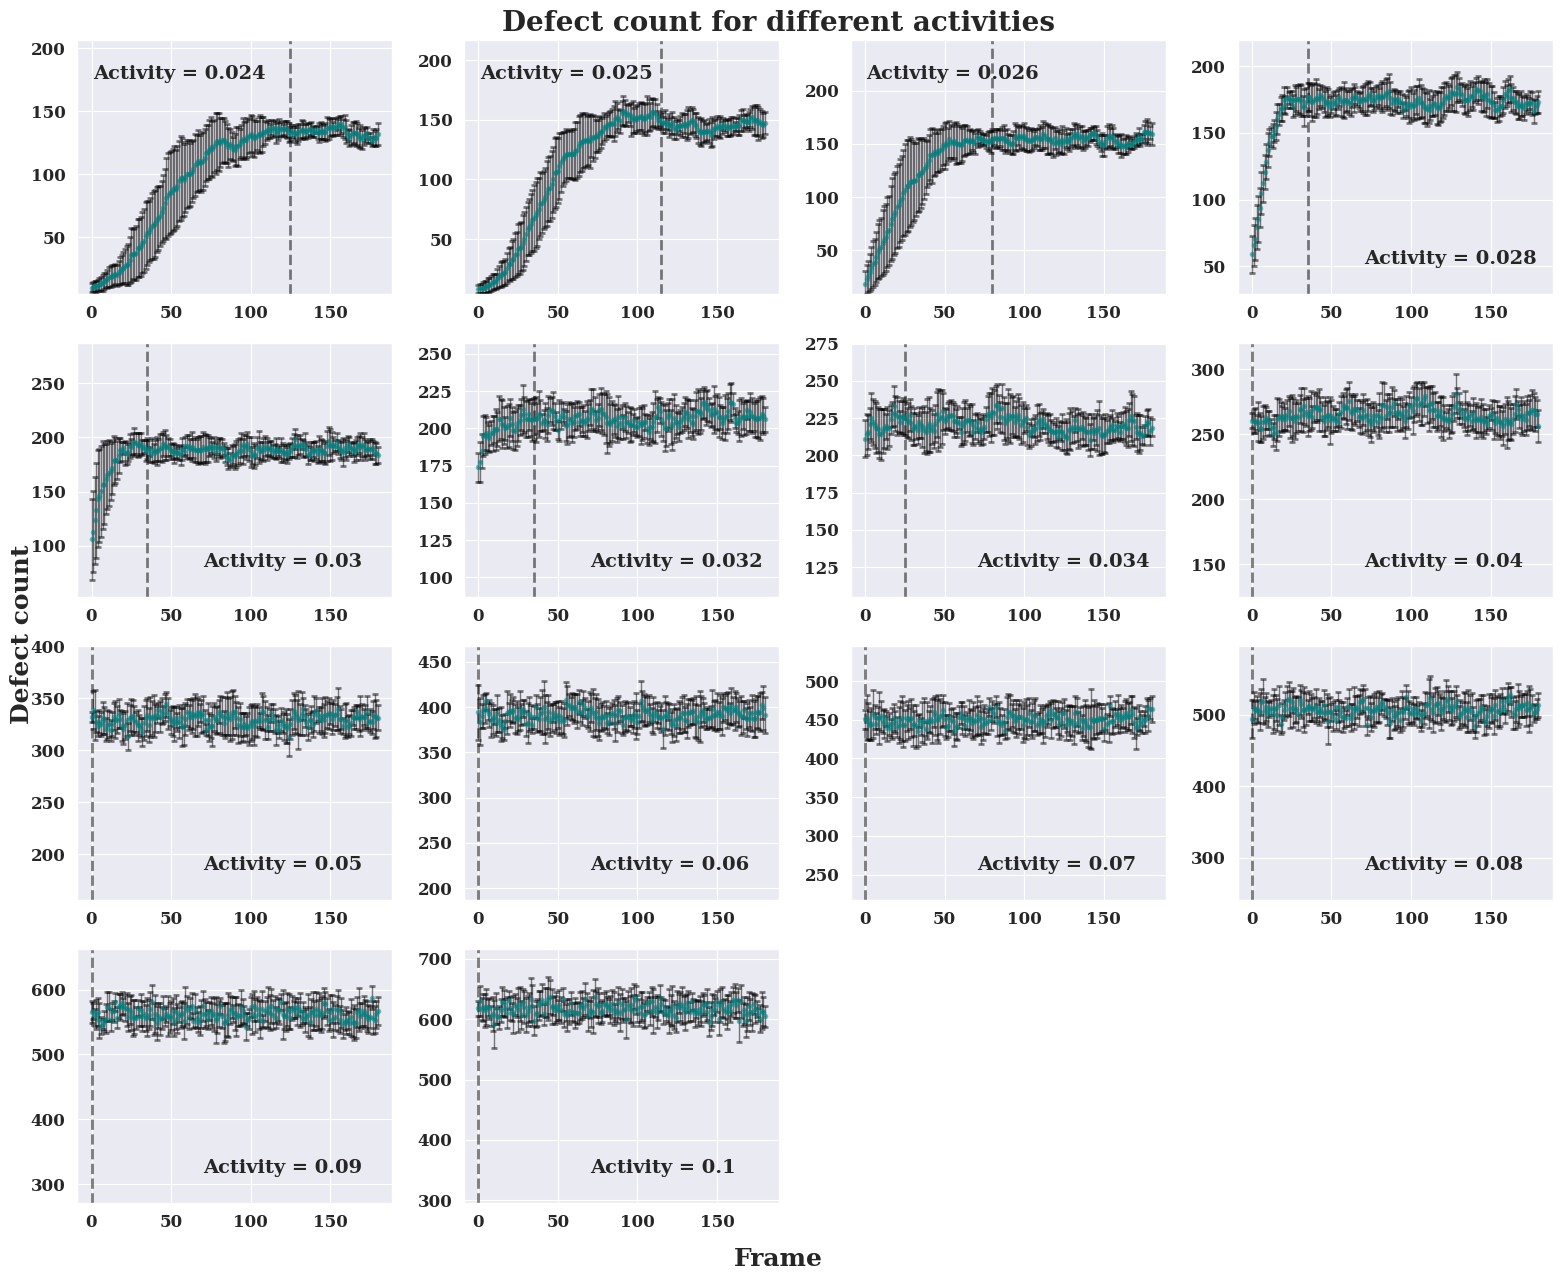

In [309]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize=(16, 13))
ax = ax.flatten()
for i, act in enumerate(act_list):
    ax[i].errorbar(np.arange(Nframes), defect_arr_av[:, i], defect_arr_std[:, i], label='activity = {}'.format(act), fmt='.', \
                   capsize=2, capthick=1, elinewidth=1, markeredgewidth=2, alpha = 0.5, markersize=4, ecolor='black')
    
    # plot vertical lines to indicate the start of the averaging
    ax[i].axvline(x=conv_dict[act], color='black', linestyle='--', alpha=0.5)
    ax[i].set_ylim(np.min(defect_arr_av[:,i])/2, np.max(defect_arr_av[:, i]) + 2  * np.max(defect_arr_std[:, i]))

    if i < 3:
        ax[i].text(0.05, 0.9, 'Activity = {}'.format(act), transform=ax[i].transAxes, fontsize=14, verticalalignment='top')
    else:
        ax[i].text(0.4, 0.1, 'Activity = {}'.format(act), transform=ax[i].transAxes, fontsize=14, verticalalignment='bottom')

fig.suptitle('Defect count for different activities')
fig.supxlabel('Frame')
fig.supylabel('Defect count')

ax[-1].axis('off')
ax[-2].axis('off')


plt.tight_layout()
plt.show()

In [6]:
def linear(x, a, b):
    return a * x + b
# Try fitting with other functions
def qudratic(x, a, b, c):
    return a * x**2 + b * x + c
def power(x, a, b, c, d):
    return a * x**d + b * x + c
def log_func(x, a, b, c):
    return a * np.log(x) + b*x + c

In [7]:
# do a linear fit to the average defect density


param_guess_lin = np.array([70 * 100, 100])
param_guess_quad = np.array([70 * 100, 100, 0])
param_guess_power = np.array([7000, 2, 7100, -29])
param_guess_log = np.array([7000, 300, 30])
fit_func = log_func
fit_string = rf'$y = a x^2 + bx + c$'
fit_string = rf'$y = a \ln x + bx + c $'

param_guess = param_guess_log
# fit starting with different lower activity values
for i in range(0, len(act_list) - 1):
    lin_fit = do_chi2_fit(fit_func, act_list[i:], av_defects[i:, 0], av_defects[i:, 1], parameter_guesses= param_guess, verbose=False)

    print("Fitting only activities >= {}".format(act_list[i]))
    Ndof, chi2, pval = get_statistics_from_fit(lin_fit, len(act_list[i:]))
    print("Ndof, chi2, pval: ", Ndof, np.round(chi2, 2), np.round(pval, 7))
print("\n\n")

for i in range(3, len(act_list) - 1):
    lin_fit = do_chi2_fit(fit_func, act_list[1:i], av_defects[1:i, 0], av_defects[1:i, 1], parameter_guesses= param_guess, verbose=False)

    print("Fitting only activities < {}".format(act_list[i]))
    Ndof, chi2, pval = get_statistics_from_fit(lin_fit, len(act_list[1:i]))
    print("Ndof, chi2, pval: ", Ndof, np.round(chi2, 2), np.round(pval, 5))
 
lower_act_index = act_list.index(0.025)
upper_act_index = act_list.index(0.07)

lin_fit = do_chi2_fit(fit_func, act_list[lower_act_index:], av_defects[lower_act_index:, 0], av_defects[lower_act_index:, 1], parameter_guesses= param_guess, verbose=False)
Ndof, chi2, pval = get_statistics_from_fit(lin_fit, len(act_list[lower_act_index:]))

lin_fit_lower = do_chi2_fit(fit_func, act_list[1:upper_act_index], av_defects[1:upper_act_index, 0], av_defects[1:upper_act_index, 1], parameter_guesses= param_guess, verbose=False)
Ndof_lower, chi2_lower, pval_lower = get_statistics_from_fit(lin_fit_lower, len(act_list[1:upper_act_index]))

Fitting only activities >= 0.024
Ndof, chi2, pval:  11 45.91 3.4e-06
Fitting only activities >= 0.025
Ndof, chi2, pval:  10 22.51 0.0127272
Fitting only activities >= 0.026
Ndof, chi2, pval:  9 17.89 0.0364197
Fitting only activities >= 0.028
Ndof, chi2, pval:  8 9.15 0.3294986
Fitting only activities >= 0.03
Ndof, chi2, pval:  7 9.13 0.243476
Fitting only activities >= 0.032
Ndof, chi2, pval:  6 3.49 0.7458751
Fitting only activities >= 0.034
Ndof, chi2, pval:  5 3.1 0.6852995
Fitting only activities >= 0.04
Ndof, chi2, pval:  4 0.2 0.9954036
Fitting only activities >= 0.05
Ndof, chi2, pval:  3 0.19 0.97846
Fitting only activities >= 0.06
Ndof, chi2, pval:  2 0.07 0.967777
Fitting only activities >= 0.07
Ndof, chi2, pval:  1 0.0 0.9589526
Fitting only activities >= 0.08
Ndof, chi2, pval:  0 0.0 nan
Fitting only activities >= 0.09
Ndof, chi2, pval:  -1 0.0 nan



Fitting only activities < 0.028
Ndof, chi2, pval:  -1 0.0 nan
Fitting only activities < 0.03
Ndof, chi2, pval:  0 13.67 nan


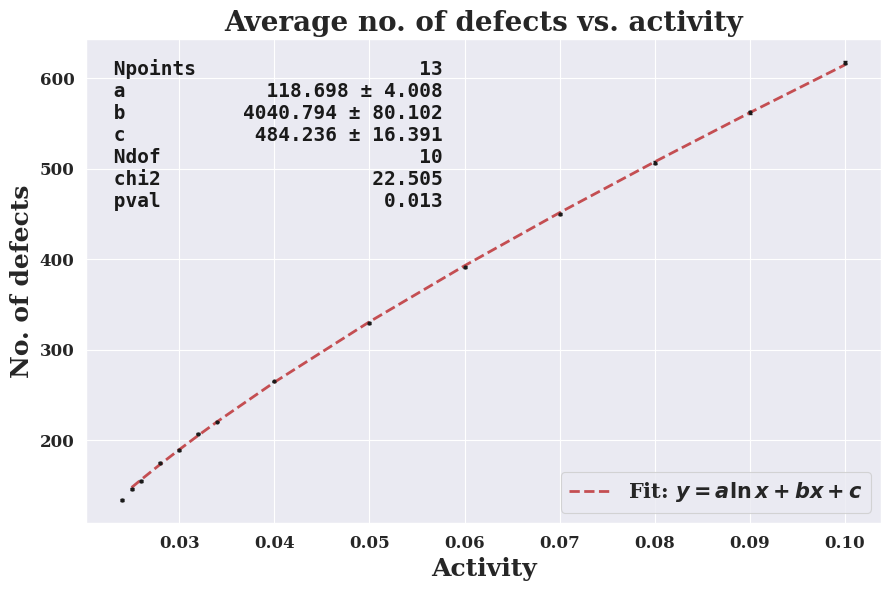

In [315]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.errorbar(act_list, av_defects[:, 0], yerr = av_defects[:, 1], fmt = 'k.', elinewidth=1.5, capsize=1.5, capthick=1, markersize = 4)
ax.set_xlabel('Activity')
ax.set_ylabel('No. of defects')
ax.set_title('Average no. of defects vs. activity')

ax.plot(act_list[lower_act_index:], fit_func(np.array(act_list[lower_act_index:]), *lin_fit.values[:]), 'r--', label=rf'Fit: {fit_string}')
#ax.plot(act_list[1:upper_act_index], fit_func(np.array(act_list[1:upper_act_index]), *lin_fit_lower.values[:]), 'b--', label='Fit 2')

#d = generate_dictionary(lin_fit, len(act_list[lower_act_index:]), chi2_suffix='1')
#d_lower = generate_dictionary(lin_fit_lower, len(act_list[1:upper_act_index]))

#d = {'a': [lin_fit.values['a'], lin_fit.errors['a']], 'b': [lin_fit.values['b'], lin_fit.errors['b']]}

d = {'Fit1: y = a1x + b1': '', 'a1': [lin_fit.values['a'], lin_fit.errors['a']], 'b1': [lin_fit.values['b'],lin_fit.errors['b'] ],\
      'Fit1 Ndof1': Ndof, 'chi2val1': chi2, 'pval1': pval}
d_lower = {'Fit2: y = a2x + b2': '', 'a2': [lin_fit_lower.values['a'], lin_fit_lower.errors['a']], 'b2': [lin_fit_lower.values['b'],lin_fit_lower.errors['b'] ],\
      'Fit2 Ndof2': Ndof_lower, 'chi2val2': chi2_lower, 'pval2': pval_lower}

d = generate_dictionary(lin_fit, len(act_list[lower_act_index:]), chi2_suffix = None)

#d.update(d_lower)
text = nice_string_output(d, extra_spacing=4, decimals=3)
add_text_to_ax(0.02, 0.96, text, ax, fontsize=14)
ax.legend(loc='lower right')

fig.tight_layout()
plt.show()

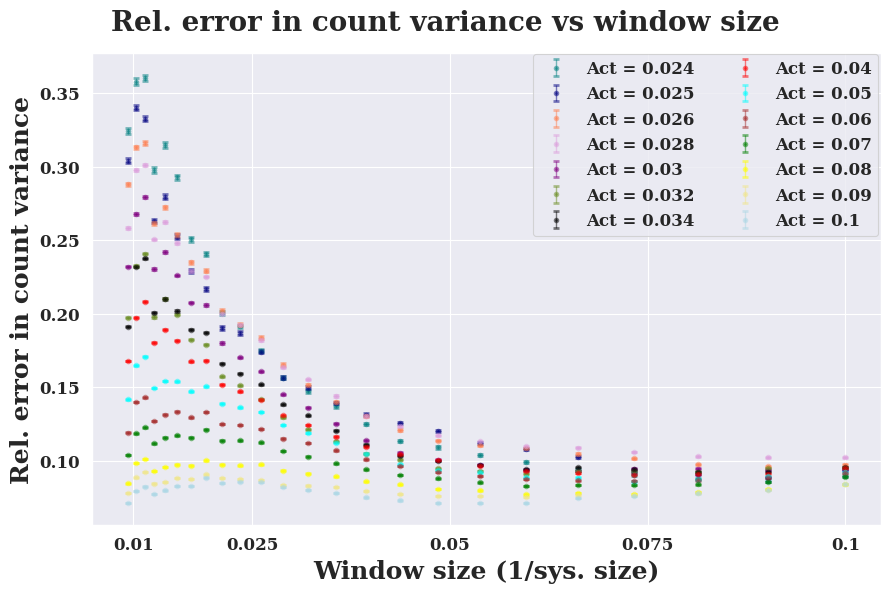

In [316]:

rel_error = var_counts_std[:,min_window_idx:,:] / var_counts_av[:,min_window_idx:,:]
rel_error_av = np.nanmean(rel_error, axis=0)

rel_error_std = np.nanstd(rel_error, axis=0, ddof=1) / Nframes_non_nan_counts[np.newaxis, :]

fig, ax = plt.subplots(figsize=(9,6))
for i, act in enumerate(act_list):
    ax.errorbar(window_sizes[min_window_idx:], rel_error_av[:,i], rel_error_std[:,i], fmt='.', label = f'Act = {act}',\
                        capsize=2, capthick=1, elinewidth=1, markeredgewidth=2, alpha = 0.5, markersize=4)
    
ax.set_xlabel('Window size (1/sys. size)')
ax.set_ylabel('Rel. error in count variance')
fig.suptitle('Rel. error in count variance vs window size')
#ax.legend(loc='upper right')

xticks = np.array([1, 2.5, 5, 7.5, 10]) * 2.56
ax.set_xticks(xticks, labels = np.round(xticks / 256,3))
fig.legend(ncol=2, fontsize = 12, bbox_to_anchor=(0.99, 0.92))
fig.tight_layout()

In [16]:
def lin_func(x, alpha, beta):
    return beta * (2 - alpha) + (2 - alpha) * x
def power_func(x, b): #, c, d, e):
    return  b * x ** 2
def power_log_func(x, b): #, c, d, e):
    return  b * x ** 2 * np.log(x)

param_guess_lin = np.array([0.1, 0.3])
param_guess_power = np.array([2400])
param_guess_power_log = np.array([2000])

R = window_sizes[min_window_idx:]

fit_func = lin_func
param_guess = param_guess_lin
log_fit = True
fit_string = rf'$y = \beta(2-\alpha) + (2-\alpha)x$'
save_suffix = 'lin'


# Initial arrays to store the fit parameters and errors for all activities and frames
Nparams = len(param_guess)
fit_params = np.zeros([Nframes, len(act_list), 2 * Nparams]) * np.nan
stat_arr = np.zeros([Nframes, len(act_list), 3]) * np.nan

In [17]:
for i, act in enumerate(act_list):  
    for frame in np.arange(first_frame_list[i], Nframes):
        count_var_av = var_counts_av[frame, min_window_idx:, i]
        count_var_std = var_counts_std[frame, min_window_idx:, i]

        if log_fit:
            x = np.log(R)
            y = np.log(count_var_av)
            yerr = count_var_std / count_var_av
        else:
            x = R
            y = count_var_av
            yerr = count_var_std

        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=np.VisibleDeprecationWarning)
            fit = do_chi2_fit(fit_func, x, y, yerr, param_guess, verbose = False)

        Ndof, chi2, prop = get_statistics_from_fit(fit, len(R), subtract_1dof_for_binning = False)
 
        fit_params[frame, i, :Nparams] = fit.values[:]
        fit_params[frame, i, Nparams:] = fit.errors[:]
        stat_arr[frame, i, :] = Ndof, chi2, prop

print("Non-converged fits: ", np.nansum((stat_arr[:, :, -1] < 0.05)))

# save
np.save(os.path.join(save_path, f'fit_params_{save_suffix}_normalize{normalize}.npy'), fit_params)
np.save(os.path.join(save_path, f'stat_arr_{save_suffix}_normalize{normalize}.npy'), stat_arr)

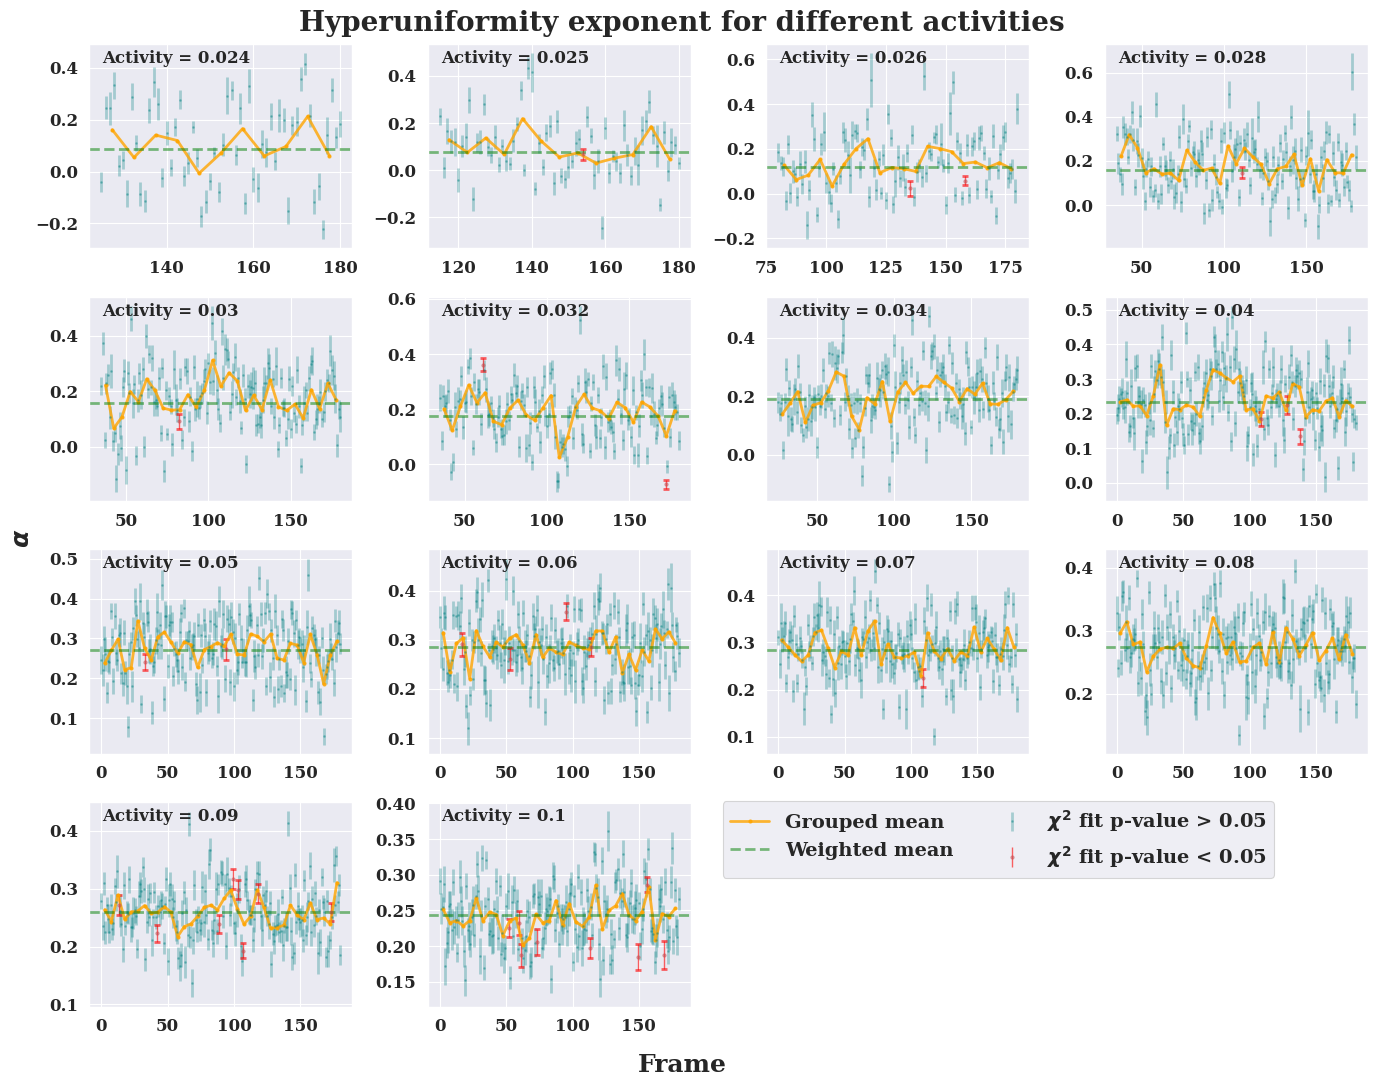

In [20]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize=(14, 11))

ax = ax.flatten()
Ngroup = 5

for i, act in enumerate(act_list):
    if i == 0:
        label1 = rf'$\chi^2$ fit p-value > 0.05'
        label2 = rf'$\chi^2$ fit p-value < 0.05'
        label3 = 'Weighted mean'
        label4 = 'Grouped mean'
    else:
        label1 = None
        label2 = None
        label3 = None
        label4 = None

    p_mask = stat_arr[first_frame_list[i]:, i, 2] > 0.05

    ax[i].errorbar(np.arange(first_frame_list[i], Nframes)[p_mask], \
                   fit_params[first_frame_list[i]:,i,0][p_mask], \
                    fit_params[first_frame_list[i]:,i,Nparams][p_mask], \
                       fmt='.', \
                   alpha = 0.3, markersize=2, label = label1)# ecolor='black')capsize=2, capthick=1, elinewidth=1, markeredgewidth=2, 
    
    ax[i].errorbar(np.arange(first_frame_list[i], Nframes)[~p_mask], \
                     fit_params[first_frame_list[i]:,i,0][~p_mask], \
                      fit_params[first_frame_list[i]:,i,Nparams][~p_mask], \
                        fmt='r.', \
                     capsize=2, capthick=1, elinewidth=1, markeredgewidth=2, alpha = 0.6, markersize=2, ecolor='red', label = label2)

    x = fit_params[first_frame_list[i]:, i, 0]

    max_idx = len(x) - len(x) % Ngroup 
    # group the data and calculate the weighted mean and error on mean
    x_group = x[:max_idx].reshape(-1, Ngroup).mean(axis=1)
    dx_group = np.std(x[:max_idx].reshape(-1, Ngroup), axis=1, ddof=min(Ngroup-2, 1)) / np.sqrt(Ngroup)
    x_frames = np.arange(first_frame_list[i], first_frame_list[i] + max_idx, Ngroup) + Ngroup / 2

    # plot x_group and dx_group
    ax[i].plot(x_frames, x_group, '.-', color='orange', alpha=0.8, markersize=4, label = label4)
    if 0:
        ax[i].errorbar(x_frames, \
                    x_group, \
                        dx_group, \
                        fmt='.', \
                    alpha = 0.5, markersize=4, ecolor='orange')


    mean, err, Ndof, chi2, p_val = calc_weighted_mean(x_group, dx_group)
    #ax[i].axhline(mean, color='orange', linestyle='-', alpha=0.5, lw = 2, label = label3)
    

    # calc and plot weighted mean and error on mean for all frames and activities
    mean, err, Ndof, chi2, p_val = calc_weighted_mean(x, fit_params[first_frame_list[i]:, i, Nparams])
    ax[i].axhline(mean, color='green', linestyle='--', alpha=0.5, lw = 2, label = label3)
    
    # plot vertical lines to indicate the start of the averaging
  #  ax[i].axhline(0, color='black', linestyle='--', alpha=0.5)
    #ax[i].set_ylim(np.min(defect_arr_av[:,i])/2, np.max(defect_arr_av[:, i]) + 2  * np.max(defect_arr_std[:, i]))
    ax[i].text(0.05, 0.97, 'Activity = {}'.format(act), transform=ax[i].transAxes, fontsize=12, verticalalignment='top')
    if 0:
        if i < 3:
            ax[i].text(0.05, 0.9, 'Activity = {}'.format(act), transform=ax[i].transAxes, fontsize=14, verticalalignment='top')
        else:
            ax[i].text(0.4, 0.1, 'Activity = {}'.format(act), transform=ax[i].transAxes, fontsize=14, verticalalignment='bottom')

ax[-2].axis('off')
ax[-1].axis('off')

fig.suptitle('Hyperuniformity exponent for different activities')
fig.supxlabel('Frame')
fig.supylabel(rf'$\alpha$')
fig.legend(ncol=2, fontsize = 14,bbox_to_anchor=(0.93, 0.27))

plt.tight_layout()
plt.show()

In [21]:
def lin_func_dens(x, alpha, beta):
    return beta * (- 2 - alpha) + (- 2 - alpha) * x
def power_func(x, b): #, c, d, e):
    return  b * x ** 2
def power_log_func(x, b): #, c, d, e):
    return  b * x ** 2 * np.log(x)

param_guess_lin_dens = np.array([0.1, 70])
param_guess_power = np.array([2400])
param_guess_power_log = np.array([2000])

R = window_sizes[min_window_idx:]

fit_func = lin_func_dens
param_guess = param_guess_lin_dens
log_fit = True
fit_string = rf'$y = -\beta(2+\alpha) - (2+\alpha)x$'
save_suffix = 'lin'


# Initial arrays to store the fit parameters and errors for all activities and frames
Nparams = len(param_guess)
fit_params_time_av = np.zeros([len(act_list), 2 * Nparams]) * np.nan
stat_arr_time_av = np.zeros([len(act_list), 3]) * np.nan


for i, act in enumerate(act_list):  
    for frame in np.arange(first_frame_list[i], Nframes):
        count_var_av = var_counts_av[frame, min_window_idx:, i]
        count_var_std = var_counts_std[frame, min_window_idx:, i]



        if log_fit:
            x = np.log(R)
            y = np.log(count_var_av)
            yerr = count_var_std / count_var_av
        else:
            x = R
            y = count_var_av
            yerr = count_var_std

        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=np.VisibleDeprecationWarning)
            fit = do_chi2_fit(fit_func, x, y, yerr, param_guess, verbose = False)

        Ndof, chi2, prop = get_statistics_from_fit(fit, len(R), subtract_1dof_for_binning = False)
 
        fit_params[frame, i, :Nparams] = fit.values[:]
        fit_params[frame, i, Nparams:] = fit.errors[:]
        stat_arr[frame, i, :] = Ndof, chi2, prop
     


[0.10129 0.09701 0.13059 0.18457 0.17638 0.18557 0.2025  0.23913 0.27445
 0.28375 0.28655 0.27228 0.25805 0.2415 ]
[0.00861 0.0003  0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.     ]


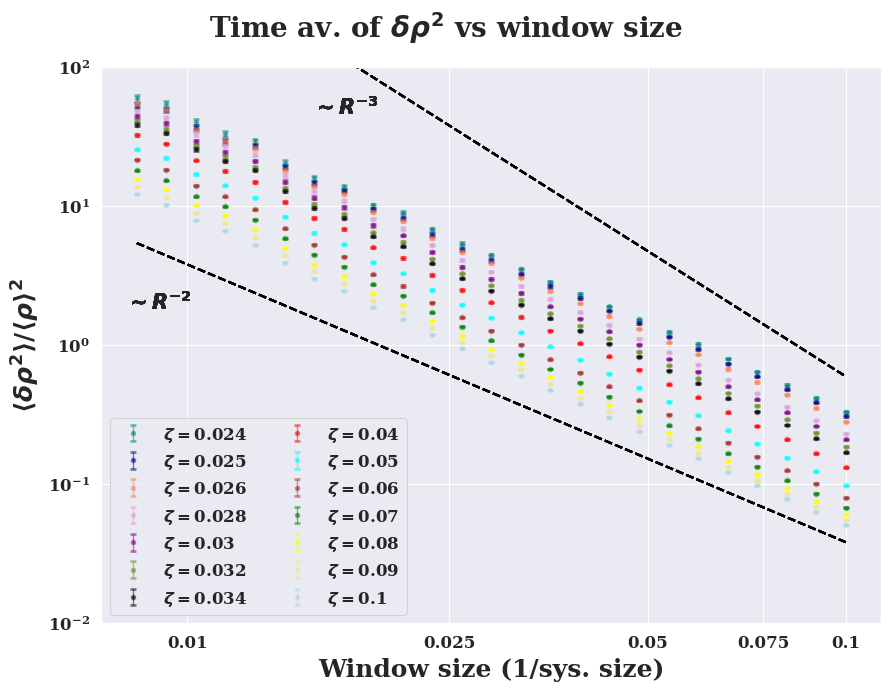

In [30]:
frame = 30
min_window_idx = 5

fig, ax = plt.subplots(figsize=(9,7))
for i, act in enumerate(act_list):
    

    frames_av_dens = np.mean(dens_fluc_av[first_frame_list[i]:, min_window_idx:,i], axis = 0)
    frames_av_dens_std = np.mean(dens_fluc_std[first_frame_list[i]:, min_window_idx:,i], axis = 0) \
                      / np.sqrt(Nframes_non_nan_counts[i])

    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=np.VisibleDeprecationWarning)
        fit = do_chi2_fit(fit_func, np.log(R), np.log(frames_av_dens), frames_av_dens_std / frames_av_dens, param_guess, verbose = False)

    Ndof, chi2, prop = get_statistics_from_fit(fit, len(R), subtract_1dof_for_binning = False)

    fit_params_time_av[i, :Nparams] = fit.values[:]
    fit_params_time_av[i, Nparams:] = fit.errors[:]
    stat_arr_time_av[i, :] = Ndof, chi2, prop


    ax.errorbar(window_sizes[min_window_idx:], frames_av_dens, \
                frames_av_dens_std, fmt='.', label = fr'$\zeta = ${act}',\
                        capsize=2, capthick=1, elinewidth=1, markeredgewidth=2, alpha = 0.5, markersize=4)

    ax.plot(window_sizes[min_window_idx:], 25 / window_sizes[min_window_idx:] ** (2), '--', color='black', alpha=0.5, lw = 1.5)
    ax.text(0.03, 0.6, r'$\sim R^{-2}$', fontsize=15, transform=ax.transAxes, verticalalignment='top', fontweight='normal')

    ax.plot(window_sizes[min_window_idx:], 10000/ window_sizes[min_window_idx:] ** (3), '--', color='black', alpha=0.5, lw = 1.5)
    ax.text(0.27, 0.95, r'$\sim R^{-3}$', transform=ax.transAxes, fontsize=15, verticalalignment='top', fontweight='normal')

ax.set_xlabel('Window size (1/sys. size)')
ax.set_ylabel(rf'$\langle \delta \rho ^2 \rangle /  \langle \rho \rangle ^2$')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(bottom=0.01, top = 100)
xticks = np.array([1, 2.5, 5, 7.5, 10]) * 2.56
ax.set_xticks(xticks, labels = np.round(xticks / 256,3))
ax.legend(ncol=2, fontsize = 12, loc = 'lower left') 

fig.suptitle(rf'Time av. of $ \delta \rho^2$ vs window size')
fig.tight_layout()

print(fit_params_time_av[:,0])
print(stat_arr_time_av[:,-1])

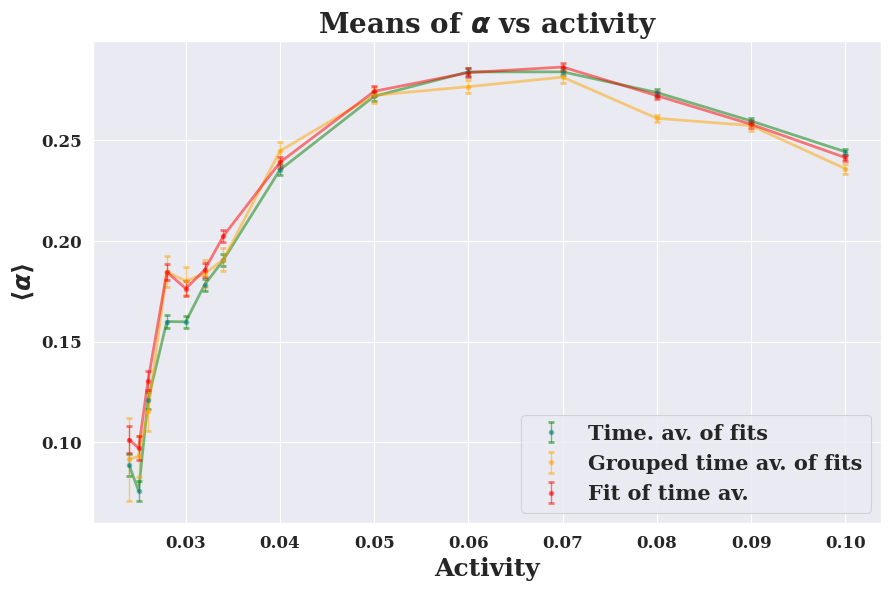

In [33]:
# calc weighted mean and error on mean for all frames and activities

Ngroup = 5
group = True
weighted_means_list = []
weighted_errs_list = []
weighted_means_group_list = []
weighted_errs_group_list = []

min_act_idx = act_list.index(0.024)

for i, act in enumerate(act_list[min_act_idx:]):
        
        if group:
                x = fit_params[first_frame_list[i + min_act_idx]:, i + min_act_idx, 0]

                max_idx = len(x) - len(x) % Ngroup
                # group the data and calculate the weighted mean and error on mean
                x_group = x[:max_idx].reshape(-1, Ngroup).mean(axis=1)
                dx_group = np.std(x[:max_idx].reshape(-1, Ngroup), axis=1, ddof=min(Ngroup-2, 1)) / np.sqrt(Ngroup)

                mean, err, Ndof, chi2, p_val = calc_weighted_mean(x_group, dx_group)
                weighted_means_group_list.append(mean)
                weighted_errs_group_list.append(err)
      
        p_mask = (0.05 < stat_arr[first_frame_list[i + min_act_idx]:, i + min_act_idx, 2])  
        x = fit_params[first_frame_list[i + min_act_idx]:, i + min_act_idx, 0][p_mask]
        dx = fit_params[first_frame_list[i + min_act_idx]:, i + min_act_idx, Nparams][p_mask]

        mean, err, Ndof, chi2, p_val = calc_weighted_mean_vec(x, dx)
        weighted_means_list.append(mean)
        weighted_errs_list.append(err)


fig2, ax2 = plt.subplots(figsize=(9,6))
ax2.errorbar(act_list[min_act_idx:], weighted_means_list, weighted_errs_list, fmt='.', label = 'Time. av. of fits', \
             capsize=2, capthick=1, elinewidth=1, markeredgewidth=2, alpha = 0.5, markersize=4, ecolor='green')
ax2.plot(act_list[min_act_idx:], weighted_means_list, '-', color='green', alpha=0.5, )
ax2.errorbar(act_list[min_act_idx:], weighted_means_group_list, weighted_errs_group_list, fmt='.', label = 'Grouped time av. of fits', \
             capsize=2, capthick=1, elinewidth=1, markeredgewidth=2, alpha = 0.5, markersize=4, ecolor='orange', color = 'orange')
ax2.plot(act_list[min_act_idx:],weighted_means_group_list,  '-',color='orange', alpha=0.5)
ax2.errorbar(act_list[min_act_idx:], fit_params_time_av[:,0], fit_params_time_av[:,Nparams], fmt='.', label = 'Fit of time av.', \
             capsize=2, capthick=1, elinewidth=1, markeredgewidth=2, alpha = 0.5, markersize=4, ecolor='red', color = 'red'
             )
ax2.plot(act_list[min_act_idx:], fit_params_time_av[:,0], '-', color='red', alpha=0.5)

ax2.set_xlabel('Activity')
ax2.set_ylabel(rf'$\langle\alpha \rangle$')
ax2.set_title(rf'Means of $\alpha $ vs activity')
ax2.legend()
fig2.tight_layout()

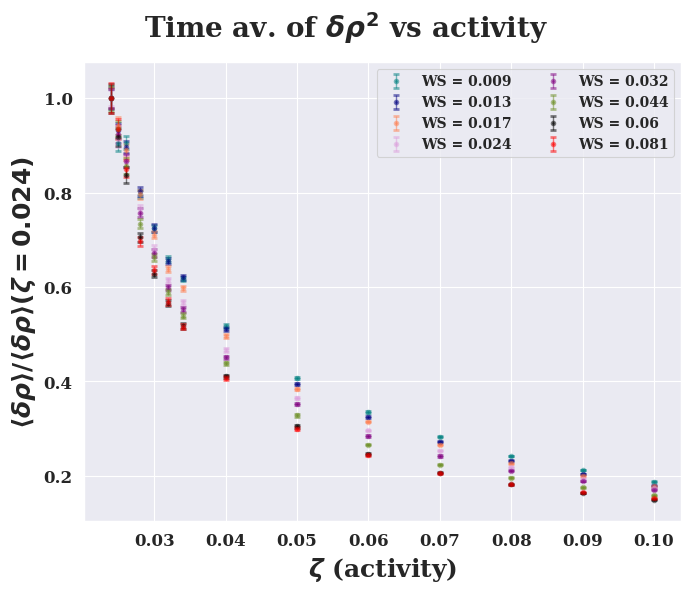

In [469]:
logplot = False

xi_av =  np.nanmean(dens_fluc_av, axis = 0) #* window_sizes[:, None]**2  #** 2
xi_std = np.nanstd(dens_fluc_av, axis = 0, ddof=1) / np.sqrt(Nframes_non_nan_counts[np.newaxis, :]) #* window_sizes[:, None]**2 #** 2

fig, ax = plt.subplots(figsize=(7,6))

for j, window in enumerate(window_sizes[min_window_idx:]):
        norm =  xi_av[j + min_window_idx, 0]
        if j % 3 == 0:
            ax.errorbar(act_list, xi_av[j + min_window_idx, :] / norm,\
                            xi_std[j + min_window_idx, :] / norm, label=f'WS = {np.round(window / 256,3)}', fmt='.', \
                   capsize=2, capthick=1, elinewidth=1, markeredgewidth=2, alpha = 0.5, markersize=4)

ax.set_xlabel(rf'$\zeta$ (activity)')
ax.set_ylabel(r'$\langle \delta \rho \rangle / \langle \delta \rho \rangle (\zeta = 0.024) $')

if logplot:
    ax.set_yscale('log')
    ax.set_xscale('log')

#add legend above the plot in 3 rows
ax.legend(loc='upper right', ncol=2, fontsize = 10,)
fig.suptitle(rf'Time av. of $\delta \rho ^2$ vs activity', fontsize=20)
fig.tight_layout()
plt.show()

C:\Users\Simon Andersen\AppData\Local\Temp\ipykernel_4192\1413094403.py:9: RuntimeWarning: Mean of empty slice
  binder_cumulants = 1 - np.nanmean(np.nanmean((av_counts/(np.pi * window_sizes[None,:,None,None]**2)) ** 4, axis = -1), axis = 0) \
C:\Users\Simon Andersen\AppData\Local\Temp\ipykernel_4192\1413094403.py:10: RuntimeWarning: Mean of empty slice
  / (3 * np.nanmean(np.nanmean((av_counts/(np.pi * window_sizes[None,:,None,None]**2)) ** 2, axis = -1), axis = 0) ** 2)


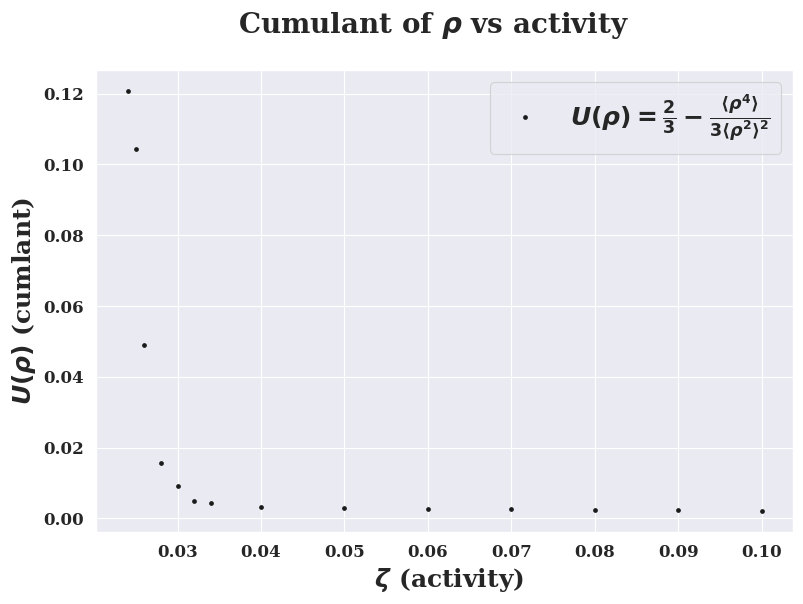

In [470]:
binder_tot = 1 - np.nanmean(np.nanmean(defect_arr[:,:,:] ** 4, axis = -1), axis = 0) \
  / (3 * np.nanmean(np.nanmean(defect_arr[:,:,:] ** 2, axis = -1), axis = 0) ** 2)


binder_cumulants = 1 - np.nanmean(np.nanmean((av_counts/(np.pi * window_sizes[None,:,None,None]**2)) ** 4, axis = -1), axis = 0) \
  / (3 * np.nanmean(np.nanmean((av_counts/(np.pi * window_sizes[None,:,None,None]**2)) ** 2, axis = -1), axis = 0) ** 2)

fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(act_list, 2/3 - binder_tot, 'k.', label=r'$U(\rho) = \frac{2}{3} - \frac{\langle \rho^4 \rangle}{3 \langle \rho^2 \rangle ^2}$')

ax.set_xlabel(r' $\zeta$ (activity)')
ax.set_ylabel(r'$U(\rho)$ (cumlant)')
ax.legend(loc='upper right', ncol=2, fontsize = 18)
fig.suptitle(rf'Cumulant of $\rho$ vs activity', fontsize=20)

plt.show()